In [636]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.optim import SGD

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [637]:
INPUT_DIMENSION=2
OUTPUT_DIMENSION=1
NUMBER_OF_SAMPLES=10000
EPOCHS=50
LR=0.01

In [638]:
class LinearClassifier(torch.nn.Module):
  def __init__(self):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(in_features=INPUT_DIMENSION, out_features=OUTPUT_DIMENSION,bias=False)

  def forward(self, x):
    x = self.linear(x)
    return x

In [639]:
SAMPLE_SIZE=50

In [640]:
#x_0=np.random.random(SAMPLE_SIZE)
#x_1=np.random.random(SAMPLE_SIZE)

#X_0=x_0+np.random.normal(0,0.3,SAMPLE_SIZE)
#X_1=x_1+np.random.normal(0,0.3,SAMPLE_SIZE)

#X_0=np.vstack((x_0,X_0)).T
#X_1=np.vstack((x_1,X_1)).T

#X=np.concatenate((X_0,X_1))
X=np.random.random(SAMPLE_SIZE)
for k in range(INPUT_DIMENSION-1):
    x=np.random.random(SAMPLE_SIZE)
    X=np.vstack((x,X.T)).T
y=np.random.randint(0,OUTPUT_DIMENSION+1,size=SAMPLE_SIZE)

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [641]:
def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [642]:
model = LinearClassifier()

for param in model.parameters():
	param.data.fill_(1)

opt = SGD(model.parameters(), lr=LR)
lossFunc = nn.MSELoss()

decision_boundaries=[]
epoch_list=[]

param_x1=[]
param_x2=[]
model_loss=[]

for epoch in range(EPOCHS):
	if (epoch+1)%5==0 or epoch==0:
		for param in model.parameters():
			param=param.tolist()[0]
			param_x1.append(param[0])
			param_x2.append(param[1])
		trainLoss=0
		samples=0
		for x,target in next_batch(X,y,1):
			output=model(x)
			trainLoss+=lossFunc(output.reshape(1,),target).item()
			samples+=1
		model_loss.append(trainLoss/samples)
		epoch_list.append(epoch)
	trainLoss=0
	acc=0
	samples=0
	for (batchX, batchY) in next_batch(X, y, 5):
		predictions = model(batchX)
		loss=lossFunc(predictions.reshape(len(batchY),), batchY)
		opt.zero_grad()
		loss.backward()
		opt.step()
		trainLoss+=loss.item()*len(batchY)
		acc += (torch.sign(predictions).reshape(1,len(batchY)) == batchY).sum().item()
		samples += len(batchY)
	print("Epoch: {} Loss: {:.3f} Accuracy {:.3f}".format(epoch+1,trainLoss/samples,acc/samples))

Epoch: 1 Loss: 0.680 Accuracy 0.420
Epoch: 2 Loss: 0.613 Accuracy 0.420
Epoch: 3 Loss: 0.557 Accuracy 0.420
Epoch: 4 Loss: 0.512 Accuracy 0.420
Epoch: 5 Loss: 0.474 Accuracy 0.420
Epoch: 6 Loss: 0.443 Accuracy 0.420
Epoch: 7 Loss: 0.418 Accuracy 0.420
Epoch: 8 Loss: 0.397 Accuracy 0.420
Epoch: 9 Loss: 0.380 Accuracy 0.420
Epoch: 10 Loss: 0.366 Accuracy 0.420
Epoch: 11 Loss: 0.355 Accuracy 0.420
Epoch: 12 Loss: 0.345 Accuracy 0.420
Epoch: 13 Loss: 0.338 Accuracy 0.420
Epoch: 14 Loss: 0.331 Accuracy 0.420
Epoch: 15 Loss: 0.326 Accuracy 0.420
Epoch: 16 Loss: 0.322 Accuracy 0.420
Epoch: 17 Loss: 0.318 Accuracy 0.420
Epoch: 18 Loss: 0.315 Accuracy 0.420
Epoch: 19 Loss: 0.313 Accuracy 0.420
Epoch: 20 Loss: 0.311 Accuracy 0.420
Epoch: 21 Loss: 0.309 Accuracy 0.420
Epoch: 22 Loss: 0.308 Accuracy 0.420
Epoch: 23 Loss: 0.307 Accuracy 0.420
Epoch: 24 Loss: 0.306 Accuracy 0.420
Epoch: 25 Loss: 0.305 Accuracy 0.420
Epoch: 26 Loss: 0.304 Accuracy 0.420
Epoch: 27 Loss: 0.304 Accuracy 0.420
Epoch: 28 

In [643]:
losses=[]
para1_limits=np.linspace(min(param_x1)-0.05,max(param_x1)+0.05,100)
para2_limits=np.linspace(min(param_x2)-0.05,max(param_x2)+0.05,100)
for p_1 in para1_limits:
    row_loss=[]
    for p_2 in para2_limits:
        model=LinearClassifier()
        for para in model.parameters():
            weight=para.tolist()[0]
        weight[0]=p_1
        weight[1]=p_2
        model.linear.weight=torch.nn.Parameter(torch.from_numpy(np.array(weight)).float())
        lossFunc = nn.MSELoss()
        trainLoss=0
        samples=0
        for x,target in next_batch(X,y,1):
            output=model(x)
            loss=lossFunc(output,target)
            trainLoss+=loss.item()
            samples+=1
        row_loss.append(trainLoss/samples)
    losses.append(row_loss)

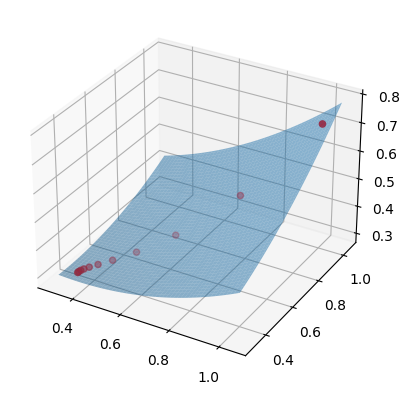

In [644]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

p1limits, p2limits = np.meshgrid(para1_limits, para2_limits)
ax.plot_surface(p1limits, p2limits,np.transpose(np.array(losses)),alpha=0.5)
ax.scatter3D(param_x1,param_x2,model_loss,c='red')